In [196]:
# Regression with weather history data set from
# https://www.kaggle.com/datasets/smid80/weatherww2/data

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [198]:
df=pd.read_csv("weatherHistory.csv")

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [200]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [201]:
df["Precip Type"].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [202]:
df.duplicated().sum()

24

In [203]:
df.drop_duplicates(keep="first", inplace=True)

In [204]:
df.duplicated().sum()

0

In [205]:
df.dropna(subset=['Precip Type'], inplace=True)

In [206]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [207]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [208]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [209]:
df["Formatted Date"].value_counts()

Formatted Date
2006-04-01 00:00:00.000 +0200    1
2013-02-03 00:00:00.000 +0100    1
2013-02-03 09:00:00.000 +0100    1
2013-02-03 08:00:00.000 +0100    1
2013-02-03 07:00:00.000 +0100    1
                                ..
2009-03-30 02:00:00.000 +0200    1
2009-03-30 01:00:00.000 +0200    1
2009-03-30 00:00:00.000 +0200    1
2009-03-03 23:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: count, Length: 95912, dtype: int64

In [210]:
df["Summary"].value_counts()

Summary
Partly Cloudy                          31628
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10746
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [211]:
df["Daily Summary"].value_counts()

Daily Summary
Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: count, Length: 214, dtype: int64

In [212]:
df['Loud Cover'].value_counts()

Loud Cover
0.0    95912
Name: count, dtype: int64

In [213]:
df.drop("Formatted Date",inplace=True,axis=1)
df.drop("Summary",inplace=True,axis=1)
df.drop("Daily Summary",inplace=True,axis=1)
df.drop("Loud Cover",inplace=True,axis=1)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95912 entries, 0 to 96452
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               95912 non-null  object 
 1   Temperature (C)           95912 non-null  float64
 2   Apparent Temperature (C)  95912 non-null  float64
 3   Humidity                  95912 non-null  float64
 4   Wind Speed (km/h)         95912 non-null  float64
 5   Wind Bearing (degrees)    95912 non-null  float64
 6   Visibility (km)           95912 non-null  float64
 7   Pressure (millibars)      95912 non-null  float64
dtypes: float64(7), object(1)
memory usage: 6.6+ MB


In [215]:
df['Precip Type'].value_counts()

Precip Type
rain    85200
snow    10712
Name: count, dtype: int64

In [216]:
# 0:rain 1:snow
df ['Precip Type'] = np.where(df ['Precip Type'].str.contains('rain'), 0, 1)

In [217]:
df['Precip Type'].value_counts()

Precip Type
0    85200
1    10712
Name: count, dtype: int64

In [218]:
df.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [219]:
df.columns=df.columns.str.replace("(C)","")
df.columns=df.columns.str.replace("(km/h)","")
df.columns=df.columns.str.replace("(degrees)","")
df.columns=df.columns.str.replace("(km)","")
df.columns=df.columns.str.replace("(millibars)","")

In [220]:
df.columns

Index(['Precip Type', 'Temperature ', 'Apparent Temperature ', 'Humidity',
       'Wind Speed ', 'Wind Bearing ', 'Visibility ', 'Pressure '],
      dtype='object')

In [221]:
df.columns=df.columns.str.strip()

In [222]:
df.columns

Index(['Precip Type', 'Temperature', 'Apparent Temperature', 'Humidity',
       'Wind Speed', 'Wind Bearing', 'Visibility', 'Pressure'],
      dtype='object')

In [223]:
df.corr()

,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing,Visibility,Pressure
Precip Type,1.000000,-0.563533,-0.566085,0.232658,-0.067876,-0.042112,-0.316487,0.009281
Temperature,-0.563533,1.000000,0.992634,-0.632224,0.008659,0.029837,0.393813,-0.005286
Apparent Temperature,-0.566085,0.992634,1.000000,-0.602460,-0.057061,0.028846,0.382675,-0.000069
Humidity,0.232658,-0.632224,-0.602460,1.000000,-0.224697,0.000769,-0.370621,0.005377
Wind Speed,-0.067876,0.008659,-0.057061,-0.224697,1.000000,0.104484,0.100847,-0.049434
Wind Bearing,-0.042112,0.029837,0.028846,0.000769,0.104484,1.000000,0.048888,-0.011643
Visibility,-0.316487,0.393813,0.382675,-0.370621,0.100847,0.048888,1.000000,0.061009
Pressure,0.009281,-0.005286,-0.000069,0.005377,-0.049434,-0.011643,0.061009,1.000000


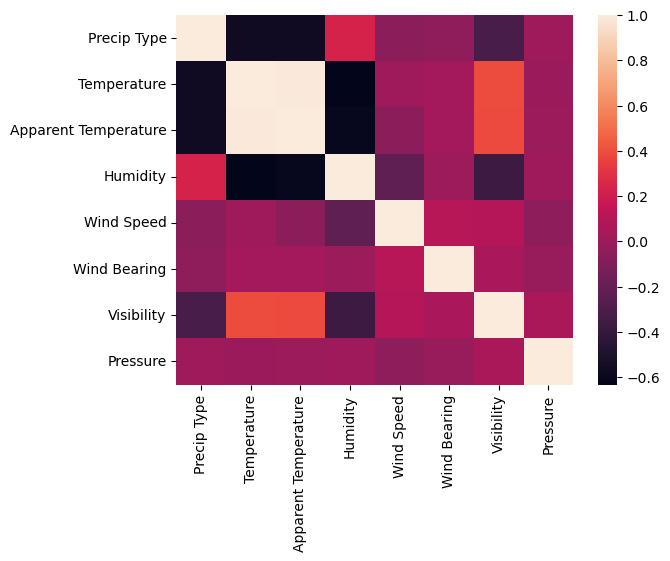

In [224]:
sns.heatmap(df.corr())
plt.show()

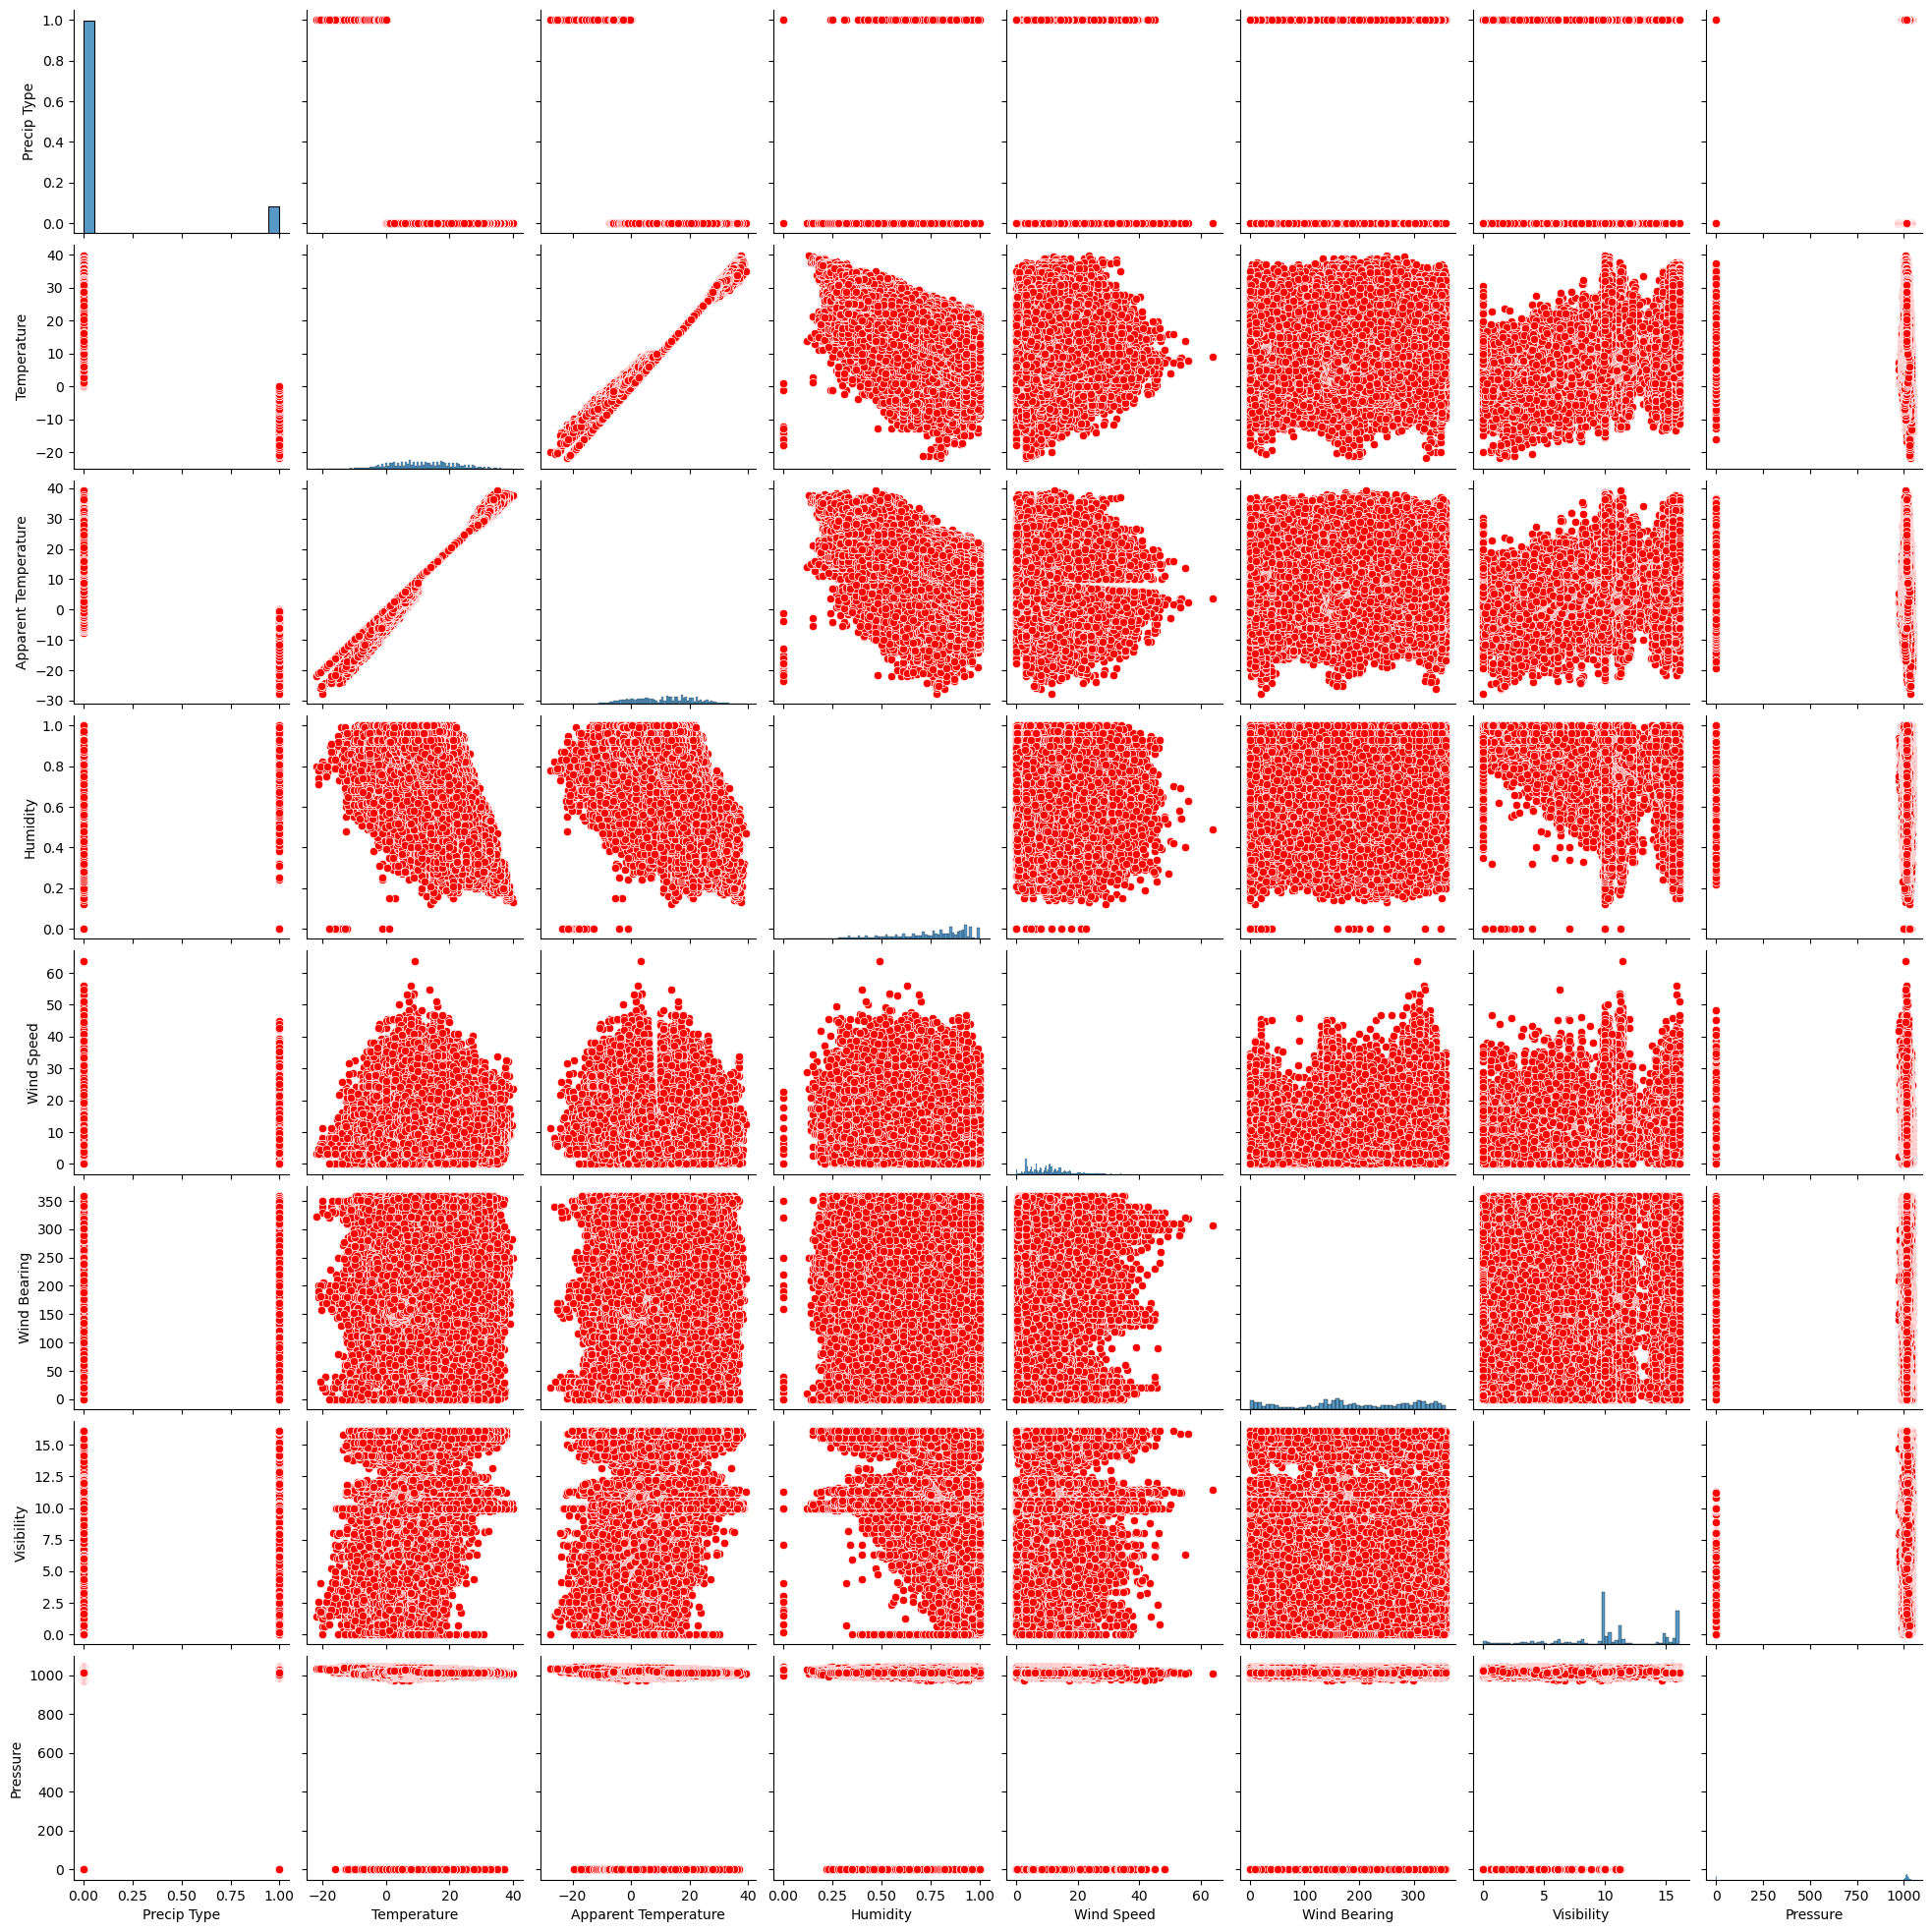

In [225]:
sns.pairplot(df, plot_kws={'color': 'red'})
plt.show()

In [226]:
# train data and test data split

In [227]:
X=df.drop("Humidity",axis=1)
y=df["Humidity"]

In [228]:
X.head()

,Precip Type,Temperature,Apparent Temperature,Wind Speed,Wind Bearing,Visibility,Pressure
0,0,9.472222,7.388889,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,3.9284,204.0,14.9569,1015.94
3,0,8.288889,5.944444,14.1036,269.0,15.8263,1016.41
4,0,8.755556,6.977778,11.0446,259.0,15.8263,1016.51


In [229]:
y.head()

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =16)

In [232]:
X_train.shape

(71934, 7)

In [233]:
X_train.corr()

,Precip Type,Temperature,Apparent Temperature,Wind Speed,Wind Bearing,Visibility,Pressure
Precip Type,1.000000,-0.563432,-0.566166,-0.065659,-0.042176,-0.313123,0.011905
Temperature,-0.563432,1.000000,0.992619,0.008153,0.030095,0.391836,-0.008405
Apparent Temperature,-0.566166,0.992619,1.000000,-0.057451,0.029253,0.380420,-0.003462
Wind Speed,-0.065659,0.008153,-0.057451,1.000000,0.102198,0.101563,-0.049430
Wind Bearing,-0.042176,0.030095,0.029253,0.102198,1.000000,0.047337,-0.008768
Visibility,-0.313123,0.391836,0.380420,0.101563,0.047337,1.000000,0.060442
Pressure,0.011905,-0.008405,-0.003462,-0.049430,-0.008768,0.060442,1.000000


In [234]:
# redundancy, multicollinearity, overfitting

In [235]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [236]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [237]:
columns_dropping

{'Apparent Temperature'}

In [238]:
X_train.drop(columns_dropping,axis=1,inplace=True)
X_test.drop(columns_dropping,axis=1,inplace=True)

In [239]:
X_train.shape

(71934, 6)

In [240]:
X_test.shape

(23978, 6)

In [241]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [242]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

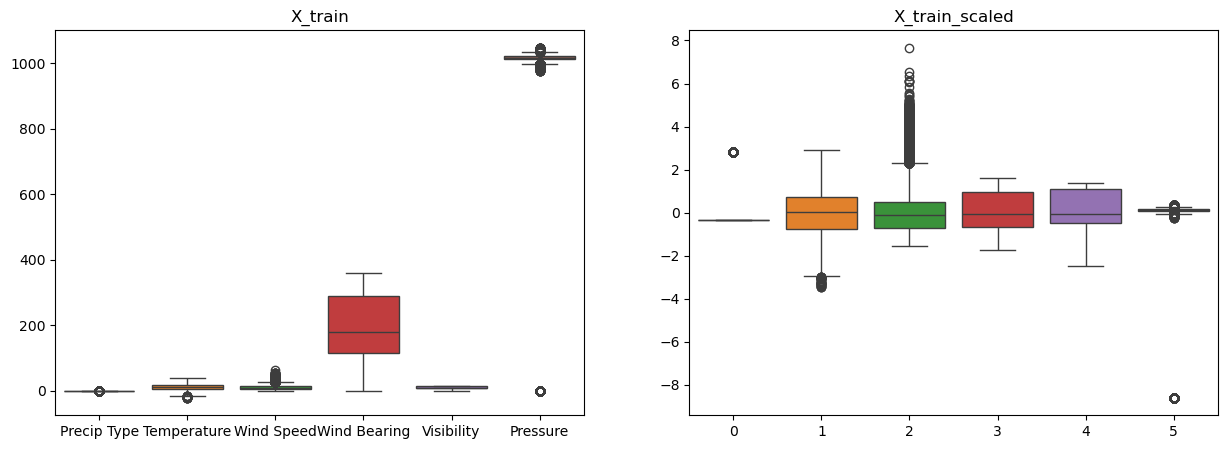

In [243]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [244]:
# Linear Regression

Mean Absolute Error: 0.1093802845934317
Mean Squared Error: 0.019179685725264378
R2 Score: 0.5025946922116558


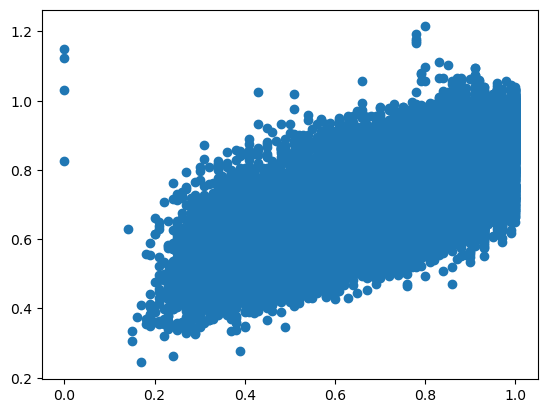

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

linear=LinearRegression()
linear.fit(X_train_scaled,y_train)
y_pred=linear.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [246]:
# Lasso

In [247]:
from sklearn.linear_model import Lasso

Mean Absolute Error: 0.1093806183604724
Mean Squared Error: 0.01917875805575419
R2 Score: 0.5026187503607229


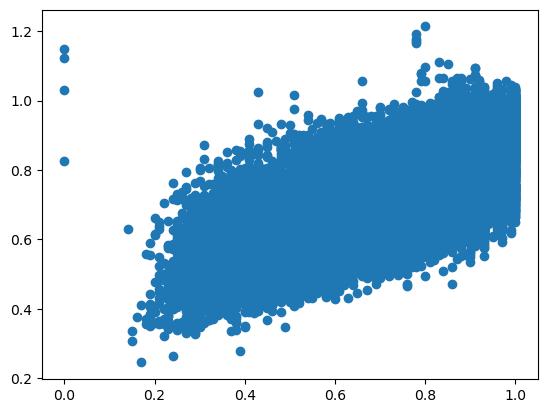

In [248]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [249]:
#Ridge

In [250]:
from sklearn.linear_model import Ridge

Mean Absolute Error: 0.10938035827554157
Mean Squared Error: 0.019179692840356234
R2 Score: 0.5025945076891091


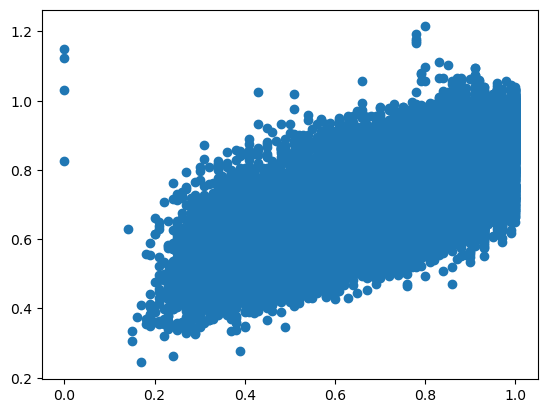

In [251]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [252]:
#ElasticNet

In [253]:
from sklearn.linear_model import ElasticNet

Mean Absolute Error: 0.10938062521744943
Mean Squared Error: 0.019179225807844754
R2 Score: 0.5026066196941466


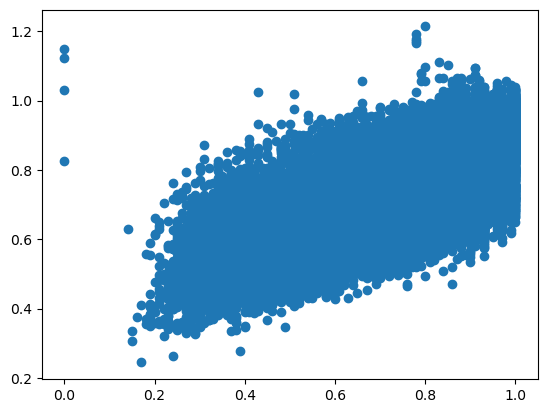

In [254]:
elastic=ElasticNet(alpha=0.0001)
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [255]:
# lasso cross validation

In [256]:
from sklearn.linear_model import LassoCV

Mean Absolute Error: 0.10938081204815726
Mean Squared Error: 0.019178571261130043
R2 Score: 0.50262359468606


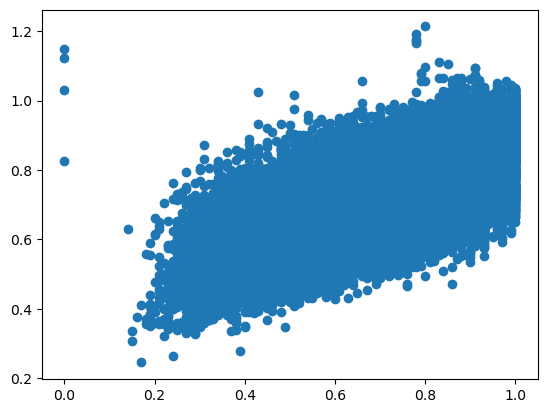

In [257]:
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled,y_train)
y_pred=lassoCV.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [258]:
lassoCV.alpha_

0.000122892847300277

In [259]:
lassoCV.alphas_

array([0.12289285, 0.11461028, 0.10688593, 0.09968218, 0.09296393,
       0.08669847, 0.08085529, 0.07540591, 0.07032381, 0.06558422,
       0.06116406, 0.05704181, 0.05319738, 0.04961205, 0.04626837,
       0.04315003, 0.04024187, 0.0375297 , 0.03500032, 0.03264142,
       0.0304415 , 0.02838984, 0.02647646, 0.02469204, 0.02302788,
       0.02147587, 0.02002847, 0.01867862, 0.01741974, 0.01624571,
       0.0151508 , 0.01412969, 0.0131774 , 0.01228928, 0.01146103,
       0.01068859, 0.00996822, 0.00929639, 0.00866985, 0.00808553,
       0.00754059, 0.00703238, 0.00655842, 0.00611641, 0.00570418,
       0.00531974, 0.00496121, 0.00462684, 0.004315  , 0.00402419,
       0.00375297, 0.00350003, 0.00326414, 0.00304415, 0.00283898,
       0.00264765, 0.0024692 , 0.00230279, 0.00214759, 0.00200285,
       0.00186786, 0.00174197, 0.00162457, 0.00151508, 0.00141297,
       0.00131774, 0.00122893, 0.0011461 , 0.00106886, 0.00099682,
       0.00092964, 0.00086698, 0.00080855, 0.00075406, 0.00070

In [260]:
#Ridge cross validation

In [261]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error: 0.10938102219817883
Mean Squared Error: 0.019179757608159737
R2 Score: 0.502592828003128


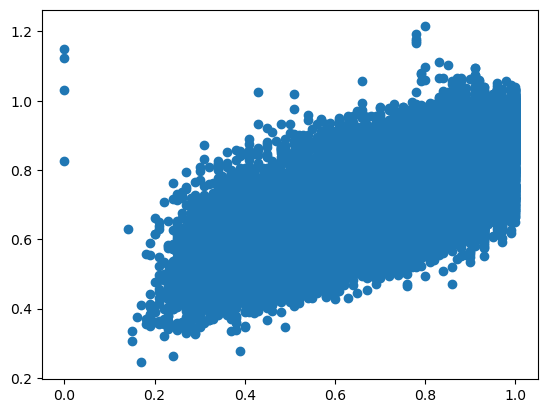

In [262]:
ridgeCV =RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred=ridgeCV.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [263]:
#Ridge cross validation

In [264]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error: 0.10938102219817883
Mean Squared Error: 0.019179757608159737
R2 Score: 0.502592828003128


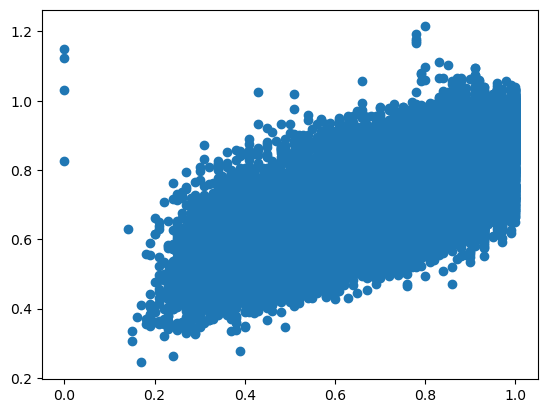

In [265]:
ridgeCV =RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred=ridgeCV.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [266]:
ridgeCV.alpha_

10.0

In [267]:
#ElasticNet cross validation

In [268]:
from sklearn.linear_model import ElasticNetCV

Mean Absolute Error: 0.10938151598228643
Mean Squared Error: 0.019178649188113205
R2 Score: 0.5026215737303676


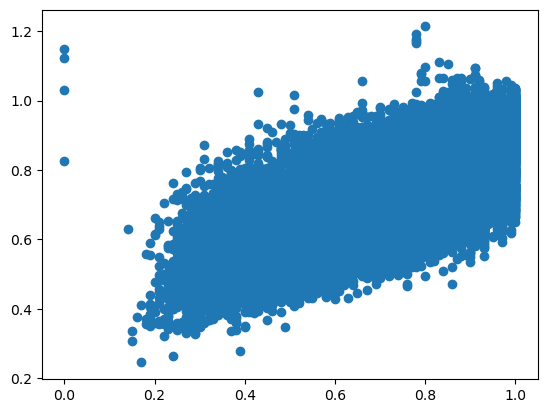

In [269]:
elasticnetCV =ElasticNetCV(cv=5)
elasticnetCV.fit(X_train_scaled,y_train)
y_pred=elasticnetCV .predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

In [270]:
elasticnetCV.alpha_

0.000245785694600554

In [271]:
elasticnetCV.alphas_

array([0.24578569, 0.22922056, 0.21377186, 0.19936435, 0.18592786,
       0.17339695, 0.16171057, 0.15081182, 0.14064761, 0.13116843,
       0.12232812, 0.11408361, 0.10639476, 0.09922411, 0.09253674,
       0.08630007, 0.08048373, 0.0750594 , 0.07000065, 0.06528284,
       0.06088299, 0.05677968, 0.05295292, 0.04938407, 0.04605575,
       0.04295175, 0.04005694, 0.03735724, 0.03483949, 0.03249142,
       0.03030161, 0.02825938, 0.02635479, 0.02457857, 0.02292206,
       0.02137719, 0.01993644, 0.01859279, 0.01733969, 0.01617106,
       0.01508118, 0.01406476, 0.01311684, 0.01223281, 0.01140836,
       0.01063948, 0.00992241, 0.00925367, 0.00863001, 0.00804837,
       0.00750594, 0.00700006, 0.00652828, 0.0060883 , 0.00567797,
       0.00529529, 0.00493841, 0.00460558, 0.00429517, 0.00400569,
       0.00373572, 0.00348395, 0.00324914, 0.00303016, 0.00282594,
       0.00263548, 0.00245786, 0.00229221, 0.00213772, 0.00199364,
       0.00185928, 0.00173397, 0.00161711, 0.00150812, 0.00140